 ## Plot seaice extent using tsplot (v0.0.2)

In [2]:
import tsplot as ts 
import pandas as pd
import os

Start by downloading the data from ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/

In [3]:
def getdata(files):
    import urllib.request
    if not os.path.exists('data'):os.makedirs('data')

    serv = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/"
    local = "data"

    for file in files:
        try:
            urllib.request.urlretrieve("".join((serv,file)), os.path.join(local, file) )
            urllib.request.urlcleanup()
        except ValueError:
            pass

this simple function downloads the .csv files and puts them in a folder called 'data'

In [4]:
files = [ "S_seaice_extent_climatology_1981-2010_v3.0.csv",
            "S_seaice_extent_daily_v3.0.csv"]
getdata(files)

Load the file as a Pandas dataframe

In [5]:
# Load data as a Pandas dataframe
df = pd.read_csv(os.path.join('data', files[1]),skiprows=[1])
# Remove whitespace in headers
df.rename(columns=lambda x: x.strip(),inplace=True)
# Data to plot
Y = df['Extent']

Use tsplot to plot the data

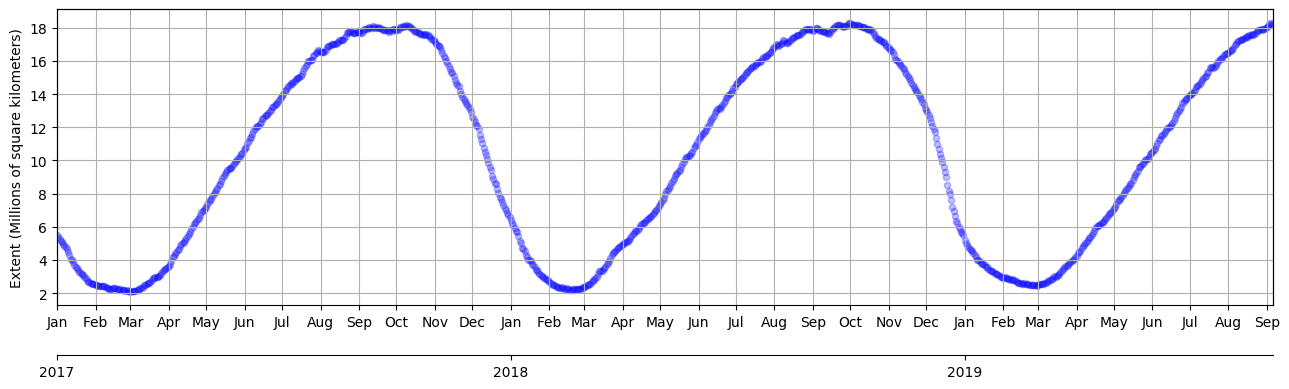

In [9]:
# Time window to plot [YYYY,MM,DD]
startdate   = [2017,1,1]
enddate     = [2019,9,6]

'''
Calculate epoch time from year,month, and day 
'''
df = ts.time.addepoch(df,yearstr='Year',monthstr='Month',daystr='Day')

'''
Create X and Y array points
''' 
Y,Xpts,xmax             = ts.time.datasync(Y,df['elapsed_1970'].values,startdate,enddate)

'''
Create ticks for Year, Month
'''
mlabels,mlocs,ylabels,ylocs   = ts.time.ticks(startdate,enddate)

'''
Create timsie plot class
'''
plotter         = ts.plot.Series(
                    xlabels_l1=[mlabels,mlocs],
                    xlabels_l2=[ylabels,ylocs],
                    ylabel='Extent (Millions of square kilometers)',
                    figsize=(13,4),dpi=100)

'''
Plot data
'''
plotter.scatter(Xpts,Y,s=20,alpha=0.25,c='b')
plotter.xlimits(0,xmax,xlabels_l2=True)
plotter.fixplot()
plotter.show()
